In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("iris.csv")


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [4]:
print(df.isnull().sum())

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [5]:
name=df["Species"].value_counts().index
counts=df["Species"].value_counts().values


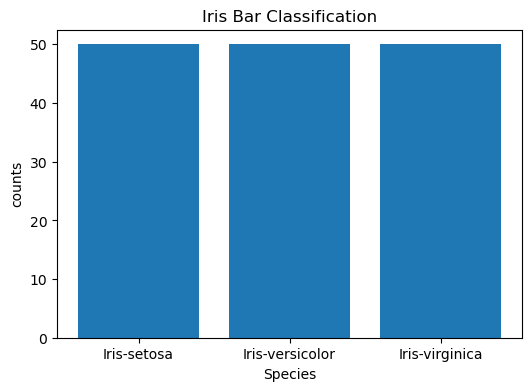

In [6]:
plt.figure(figsize=(6,4))
plt.bar(x=name,height=counts)
plt.title("Iris Bar Classification")
plt.xlabel("Species")
plt.ylabel("counts")
plt.savefig("plot.png")
plt.show()


In [7]:
X=df.drop(columns=["Species"])
y=df['Species']

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

In [9]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
130,7.4,2.8,6.1,1.9
119,6.0,2.2,5.0,1.5
29,4.7,3.2,1.6,0.2
0,5.1,3.5,1.4,0.2
62,6.0,2.2,4.0,1.0


In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [11]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print("accuracy=",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

accuracy= 0.9666666666666667
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.83      0.91         6
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30



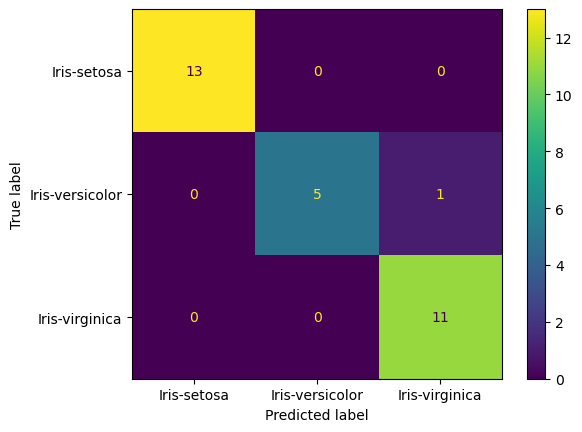

In [12]:
cm=confusion_matrix(y_test,y_pred)
cm_plot=ConfusionMatrixDisplay(cm,display_labels=df["Species"].unique())
cm_plot.plot()
plt.savefig("confusionmatrix.png")

In [13]:
test_pred=knn.predict([[5.1,3.5,1.4,0.2]])
print(test_pred[0])

Iris-setosa


/opt/anaconda3/envs/ai/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [14]:
import joblib
joblib.dump(knn,"model.joblib")
print('success')

success
